In [2]:
import pandas as pd
#%matplotlib inline
import numpy as np

In [4]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

Column names:ZIP Code,Week Number,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly


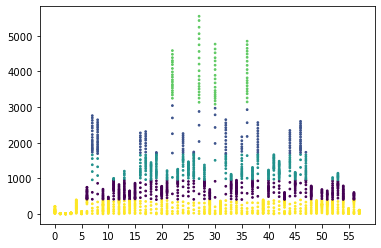

In [1]:
df = pd.read_csv("covid_case.csv")
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(df.iloc[:, 1:])
df.iloc[:, 1:] = imputer.transform(df.iloc[:, 1:])

# colum names
cols = input("Column names:")
cols = cols.split(',')
df = df[cols]

def Kmean():
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])],     remainder='passthrough')
    df2=columnTransformer.fit_transform(df)
    ##########################
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    df["ZIP Code"]=labelencoder.fit_transform(df["ZIP Code"])
    #from sklearn.preprocessing import OneHotEncoder
    #onehotencoder = OneHotEncoder(categorical_features = [0])
    #df = onehotencoder.fit_transform(df).toarray()
    
    
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(df2)
    
    y_kmeans=y_kmeans.reshape(1665,1)
    df['cluster']=y_kmeans
    #df=df.to_numpy()
    import matplotlib.pyplot as plt
    plt.xticks(np.arange(min(df.iloc[:,0]), max(df.iloc[:,0])+1, 5.0))
    plt.scatter(df.iloc[:,0],df.iloc[:,df.columns.get_loc('Cases - Cumulative')],c=kmeans.labels_,s=3);   
    plt.show()
Kmean()